In [509]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [8]:
#Read in the csv file and convert to a Pandas dataframe
wh2015_df = pd.read_csv("2015.csv")

In [9]:
wh2016_df = pd.read_csv("2016.csv")

In [10]:
wh2017_df = pd.read_csv("2017.csv")

In [11]:
wh2018_df = pd.read_csv("2018.csv")

In [12]:
wh2019_df = pd.read_csv("2019.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [14]:
wh2015_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [15]:
wh2016_df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [16]:
wh2017_df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [17]:
wh2018_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [18]:
wh2019_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [20]:
wh2015_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [21]:
wh2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [22]:
wh2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [23]:
wh2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [24]:
wh2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [25]:
wh2015_df.shape

(158, 12)

In [26]:
wh2016_df.shape

(157, 13)

In [27]:
wh2017_df.shape

(155, 12)

In [28]:
wh2018_df.shape

(156, 9)

In [29]:
wh2019_df.shape

(156, 9)

In [30]:
wh2015_df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [31]:
wh2016_df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [32]:
wh2017_df.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [33]:
wh2018_df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [34]:
wh2019_df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [35]:
wh2015_df.columns 

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [36]:
wh2016_df.columns 

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [37]:
wh2017_df.columns 

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [38]:
wh2018_df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [39]:
wh2019_df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [43]:
# in the kaggle page mentioned data source

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [45]:
#Not up-to-date

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [47]:
# the data is consistent

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [49]:
wh2015_df.drop(["Standard Error"],axis=1,inplace=True)

In [50]:
wh2015_df.drop(["Region"],axis=1,inplace=True)

In [51]:
#wh2015_df.drop(["Dystopia Residual"],axis=1,inplace=True)

In [52]:
wh2015_df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [53]:
wh2016_df.drop(["Lower Confidence Interval"],axis=1,inplace=True)     

In [54]:
wh2016_df.drop(["Upper Confidence Interval"],axis=1,inplace=True) 

In [55]:
wh2016_df.drop(["Region"],axis=1,inplace=True)

In [56]:
#wh2016_df.drop(["Dystopia Residual"],axis=1,inplace=True)

In [57]:
wh2016_df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [58]:
wh2017_df.drop(["Whisker.high"],axis=1,inplace=True) 

In [59]:
wh2017_df.drop(["Whisker.low"],axis=1,inplace=True) 

In [60]:
wh2017_df.head()

,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [61]:
wh2018_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [62]:
wh2019_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [64]:
wh2015_df.duplicated().sum()

0

In [65]:
wh2016_df.duplicated().sum()

0

In [66]:
wh2017_df.duplicated().sum()

0

In [67]:
wh2018_df.duplicated().sum()

0

In [68]:
wh2019_df.duplicated().sum()

0

In [69]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [71]:
#Display number missing values per column
wh2015_df.isnull().sum().sort_values(ascending = False)

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [72]:
wh2016_df.isnull().sum().sort_values(ascending = False)

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [73]:
wh2017_df.isnull().sum().sort_values(ascending = False)

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [74]:
wh2018_df.isnull().sum().sort_values(ascending = False)
#there is one null value 

Perceptions of corruption       1
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
dtype: int64

In [75]:
wh2019_df.isnull().sum().sort_values(ascending = False)

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [76]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [78]:
# check columns types 
wh2015_df.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [79]:
wh2016_df.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [80]:
wh2017_df.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

In [81]:
wh2018_df.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [82]:
wh2019_df.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [83]:
# go to clean them 

In [84]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [86]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [87]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [88]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [92]:
wh2018_df[wh2018_df['Perceptions of corruption'].isnull()]
# 0.2261 is an option or golf countries avg

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [93]:
wh2018_df['Perceptions of corruption'].max()

0.457

In [94]:
wh2018_df['Perceptions of corruption'] = wh2018_df['Perceptions of corruption'].fillna(0.2261)
# I took the avg of the Perceptions of corruption from 10-19 

In [95]:
# go back to 6th dimention --> Completeness
wh2018_df.head(20)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.3930
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.3400
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.4080
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.1380
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.3570
5,6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.2950
6,7,Canada,7.328,1.330,1.532,0.896,0.653,0.321,0.2910
7,8,New Zealand,7.324,1.268,1.601,0.876,0.669,0.365,0.3890
8,9,Sweden,7.314,1.355,1.501,0.913,0.659,0.285,0.3830
9,10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.3020


### Correcting errors

-------------------

In [97]:
wh2015_df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [98]:
wh2016_df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [99]:
wh2017_df.head()

,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [100]:
wh2015_df.rename( columns = {'Economy (GDP per Capita)': 'Economy (GDP per Capital)'}, inplace = True )

In [101]:
wh2015_df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capital),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [102]:
wh2016_df.rename( columns = {'Economy (GDP per Capita)': 'Economy (GDP per Capital)'}, inplace = True )

In [103]:
wh2016_df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capital),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [104]:
wh2017_df.rename( columns = {'Economy..GDP.per.Capita.' : 'Economy (GDP per Capital)', 
                             'Happiness.Rank' : 'Happiness Rank',
                             'Happiness.Score' : 'Happiness Score',
                             'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                             'Trust..Government.Corruption.' : 'Trust (Government Corruption)'
                                    }, inplace = True )

In [105]:
wh2017_df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capital),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia.Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [106]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

##### 2015

In [113]:
wh2015_df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capital),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


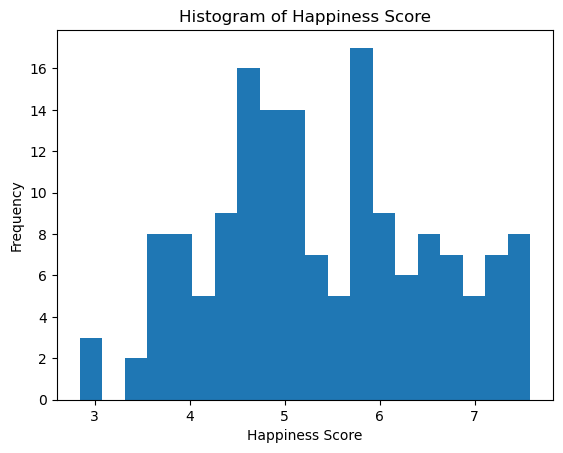

In [114]:
plt.hist(wh2015_df['Happiness Score'], bins = 20)
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title(f'Histogram of Happiness Score')
plt.show()

In [115]:
# Based on the Happiness Score  histogram chart, in my opinion there no outlier values 

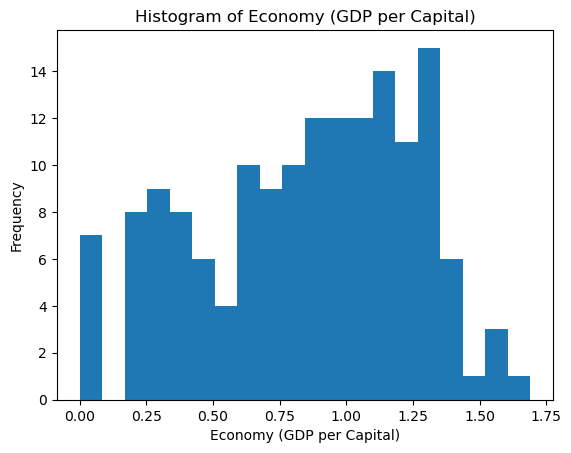

In [116]:
plt.hist(wh2015_df['Economy (GDP per Capital)'], bins = 20)
plt.xlabel('Economy (GDP per Capital)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Economy (GDP per Capital)')
plt.show()

In [117]:
# Based on the economy histogram chart, in my opinion there no outlier values 

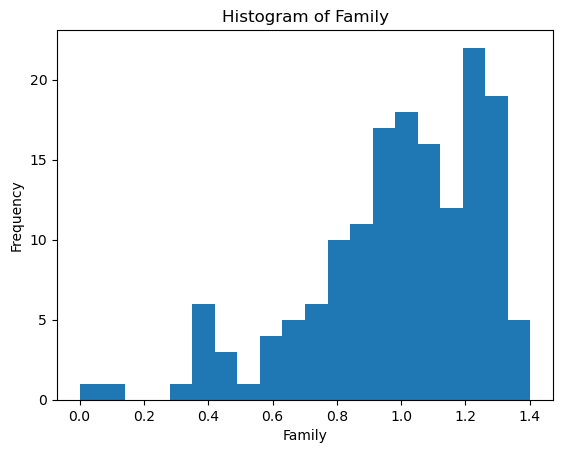

In [118]:
plt.hist(wh2015_df['Family'], bins = 20)
plt.xlabel('Family')
plt.ylabel('Frequency')
plt.title(f'Histogram of Family')
plt.show()

In [119]:
# Based on the Family histogram chart, in my opinion there no outlier values 

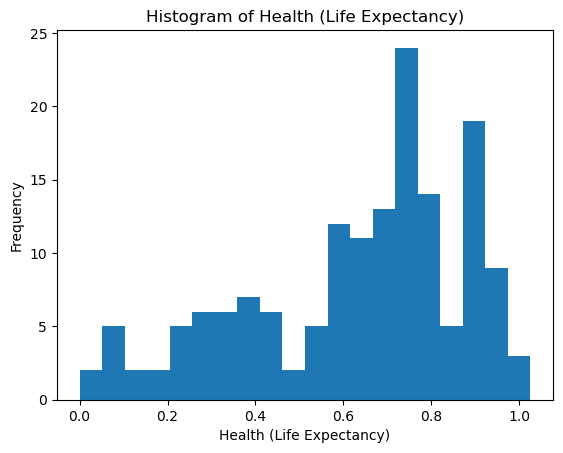

In [120]:
plt.hist(wh2015_df['Health (Life Expectancy)'], bins = 20)
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Health (Life Expectancy)')
plt.show()

In [121]:
# Based on the Health (Life Expectancy) histogram chart, in my opinion there no outlier values 

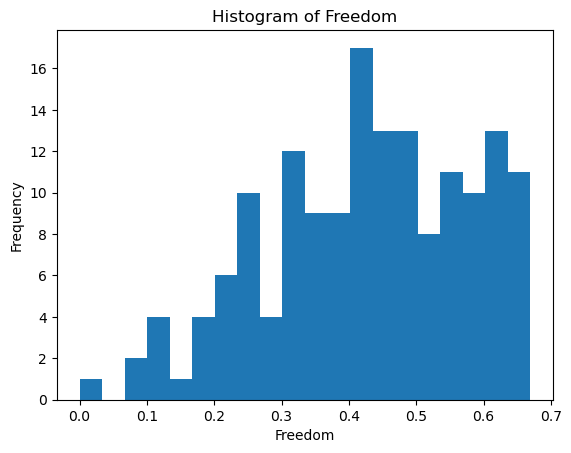

In [122]:
plt.hist(wh2015_df['Freedom'], bins = 20)
plt.xlabel('Freedom')
plt.ylabel('Frequency')
plt.title(f'Histogram of Freedom')
plt.show()

In [123]:
# Based on the Freedom histogram chart, in my opinion there no outlier values 

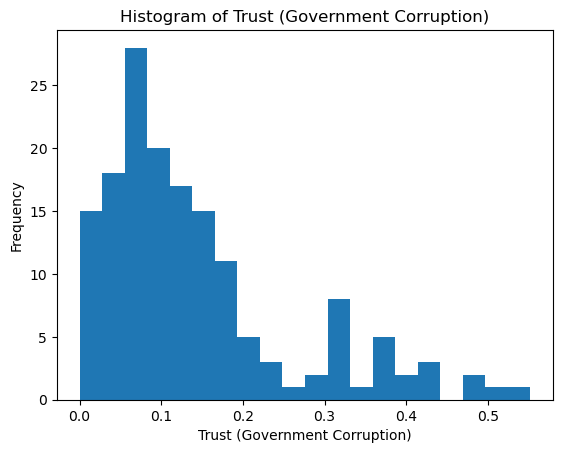

In [124]:
plt.hist(wh2015_df['Trust (Government Corruption)'], bins = 20)
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Trust (Government Corruption)')
plt.show()

In [125]:
# Based on the Trust (Government Corruption) histogram chart, in my opinion there no outlier values 

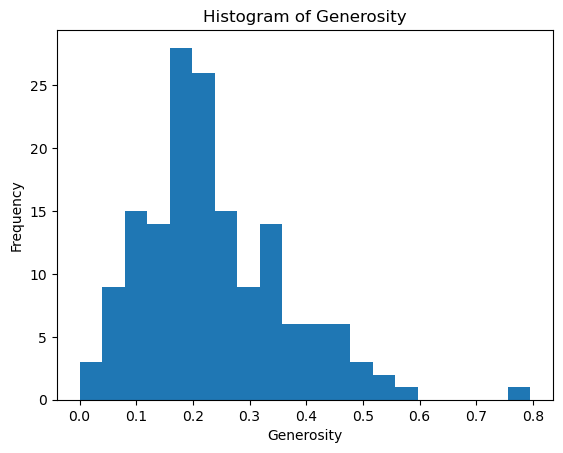

In [126]:
plt.hist(wh2015_df['Generosity'], bins = 20)
plt.xlabel('Generosity')
plt.ylabel('Frequency')
plt.title(f'Histogram of Generosity')
plt.show()

In [127]:
# Based on the Generosity histogram chart, in my opinion there no outlier values 

##### 2016

In [129]:
wh2016_df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capital),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


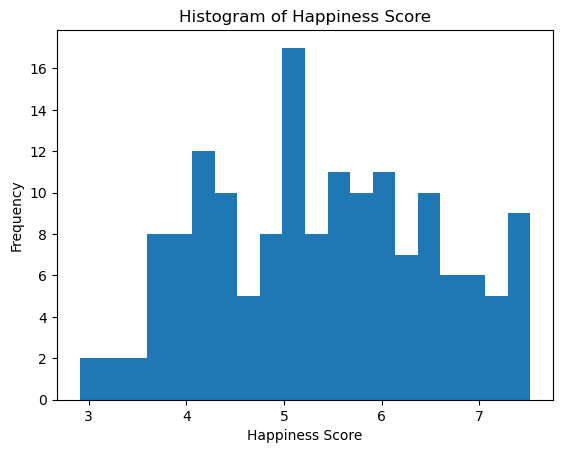

In [130]:
plt.hist(wh2016_df['Happiness Score'], bins = 20)
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title(f'Histogram of Happiness Score')
plt.show()

In [131]:
# Based on the Happiness Score histogram chart, in my opinion there no outlier values 

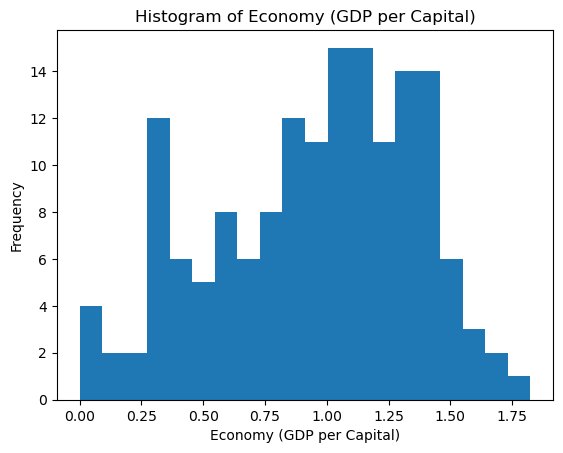

In [132]:
plt.hist(wh2016_df['Economy (GDP per Capital)'], bins = 20)
plt.xlabel('Economy (GDP per Capital)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Economy (GDP per Capital)')
plt.show()

In [133]:
# Based on the Economy (GDP per Capital) histogram chart, in my opinion there no outlier values 

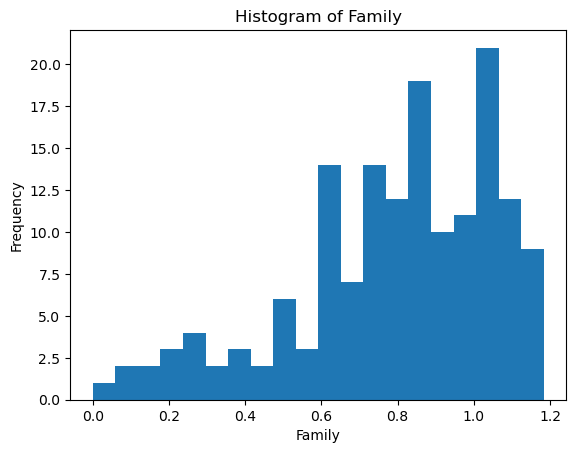

In [134]:
plt.hist(wh2016_df['Family'], bins = 20)
plt.xlabel('Family')
plt.ylabel('Frequency')
plt.title(f'Histogram of Family')
plt.show()

In [135]:
# Based on the Family histogram chart, in my opinion there no outlier values 

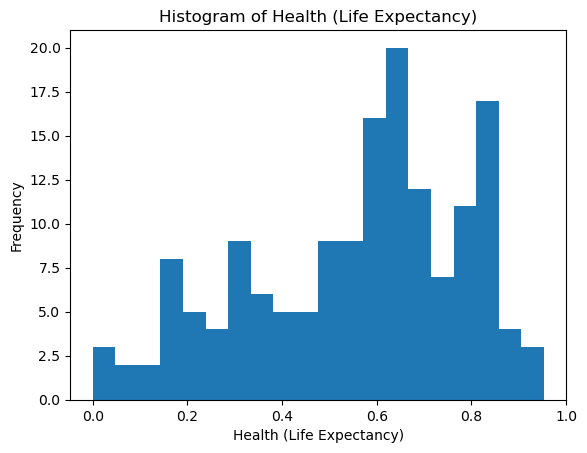

In [136]:
plt.hist(wh2016_df['Health (Life Expectancy)'], bins = 20)
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Health (Life Expectancy)')
plt.show()

In [137]:
# Based on the Health (Life Expectancy) histogram chart, in my opinion there no outlier values 

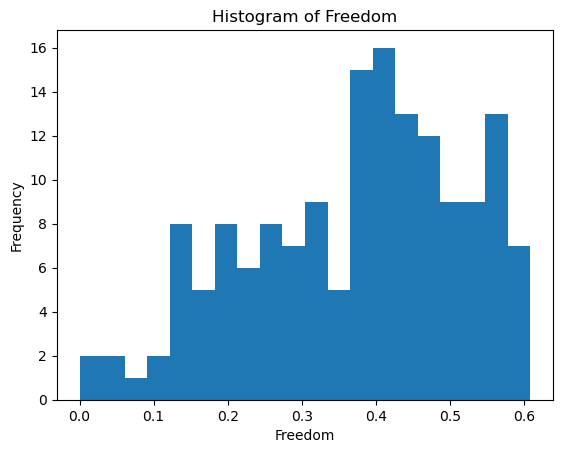

In [138]:
plt.hist(wh2016_df['Freedom'], bins = 20)
plt.xlabel('Freedom')
plt.ylabel('Frequency')
plt.title(f'Histogram of Freedom')
plt.show()

In [139]:
# Based on the Freedom histogram chart, in my opinion there no outlier values 

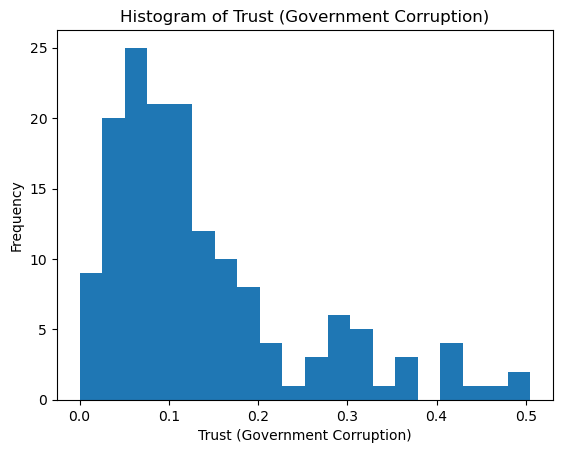

In [140]:
plt.hist(wh2016_df['Trust (Government Corruption)'], bins = 20)
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Trust (Government Corruption)')
plt.show()

In [141]:
# Based on the Trust (Government Corruption) histogram chart, in my opinion there no outlier values 

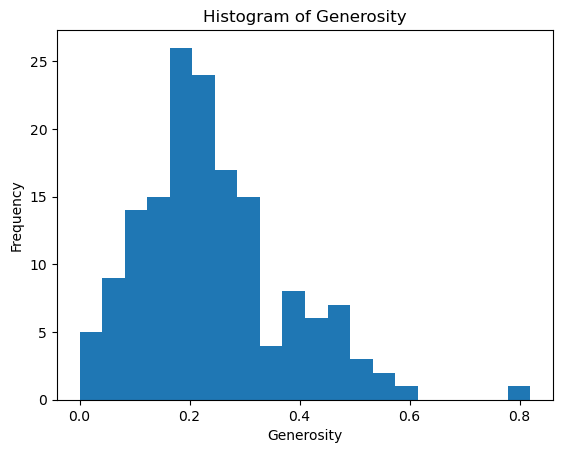

In [142]:
plt.hist(wh2016_df['Generosity'], bins = 20)
plt.xlabel('Generosity')
plt.ylabel('Frequency')
plt.title(f'Histogram of Generosity')
plt.show()

In [143]:
# Based on the Generosity histogram chart, in my opinion there no outlier values 

##### 2017

In [145]:
wh2017_df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capital),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia.Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


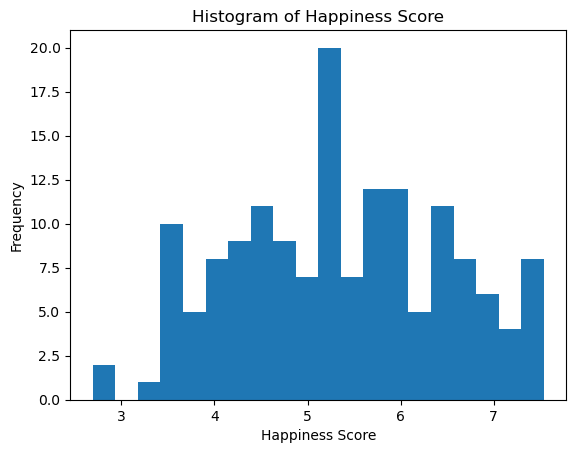

In [146]:
plt.hist(wh2017_df['Happiness Score'], bins = 20)
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title(f'Histogram of Happiness Score')
plt.show()

In [147]:
# Based on the Happiness Score histogram chart, in my opinion there no outlier values 

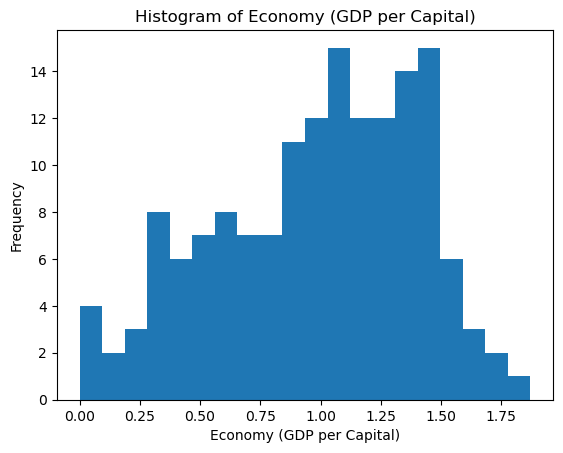

In [148]:
plt.hist(wh2017_df['Economy (GDP per Capital)'], bins = 20)
plt.xlabel('Economy (GDP per Capital)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Economy (GDP per Capital)')
plt.show()

In [149]:
# Based on the Economy (GDP per Capital) histogram chart, in my opinion there no outlier values 

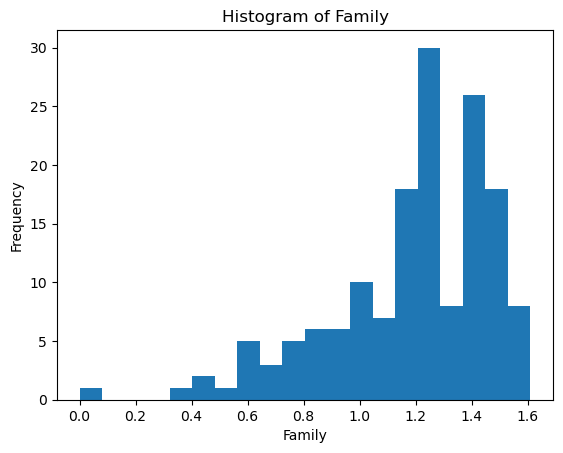

In [150]:
plt.hist(wh2017_df['Family'], bins = 20)
plt.xlabel('Family')
plt.ylabel('Frequency')
plt.title(f'Histogram of Family')
plt.show()

In [151]:
# Based on the Family histogram chart, in my opinion there no outlier values 

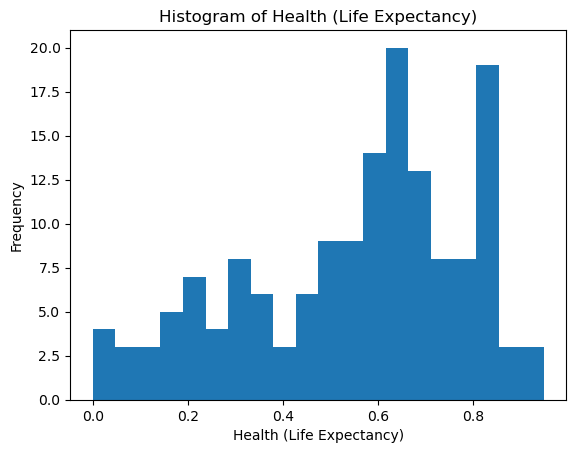

In [152]:
plt.hist(wh2017_df['Health (Life Expectancy)'], bins = 20)
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Health (Life Expectancy)')
plt.show()

In [153]:
# Based on the Health Life Expectancy histogram chart, in my opinion there no outlier values 

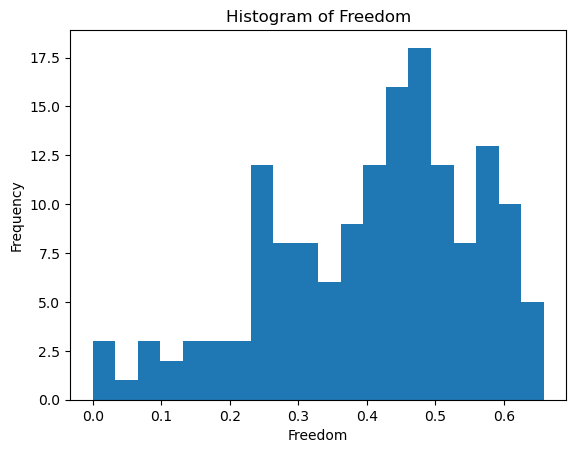

In [154]:
plt.hist(wh2017_df['Freedom'], bins = 20)
plt.xlabel('Freedom')
plt.ylabel('Frequency')
plt.title(f'Histogram of Freedom')
plt.show()

In [155]:
# Based on the Freedom histogram chart, in my opinion there no outlier values 

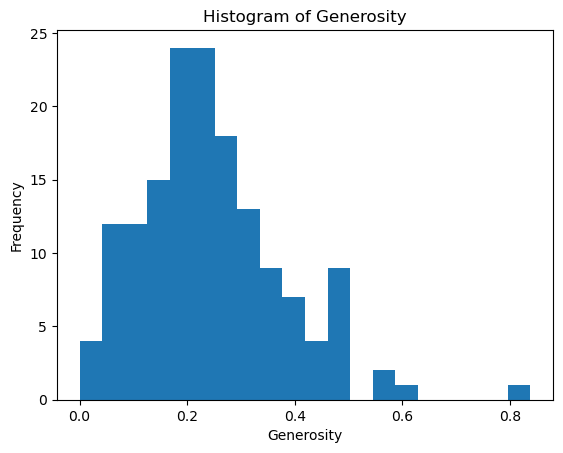

In [156]:
plt.hist(wh2017_df['Generosity'], bins = 20)
plt.xlabel('Generosity')
plt.ylabel('Frequency')
plt.title(f'Histogram of Generosity')
plt.show()

In [157]:
# Based on the Generosity histogram chart, in my opinion there no outlier values 

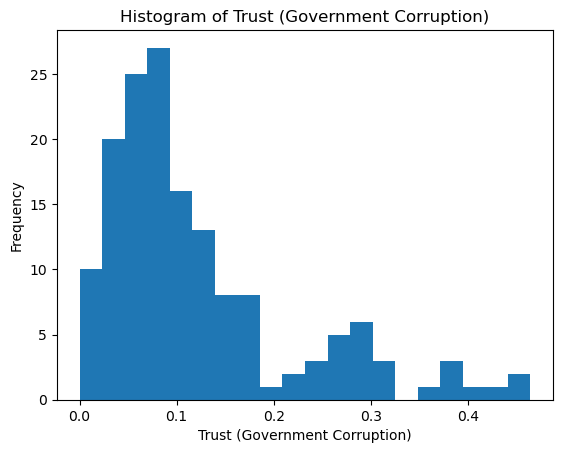

In [158]:
plt.hist(wh2017_df['Trust (Government Corruption)'], bins = 20)
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Trust (Government Corruption)')
plt.show()

In [159]:
# Based on the Trust (Government Corruption) histogram chart, in my opinion there no outlier values 

##### 2018 

In [161]:
wh2018_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


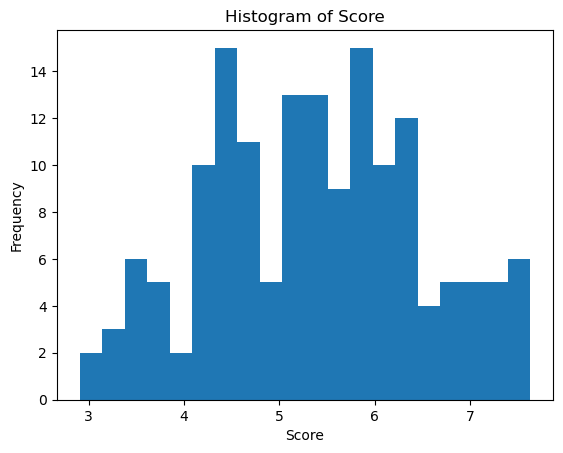

In [162]:
plt.hist(wh2018_df['Score'], bins = 20)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title(f'Histogram of Score')
plt.show()

In [163]:
# Based on the score histogram chart, in my opinion there no outlier values 

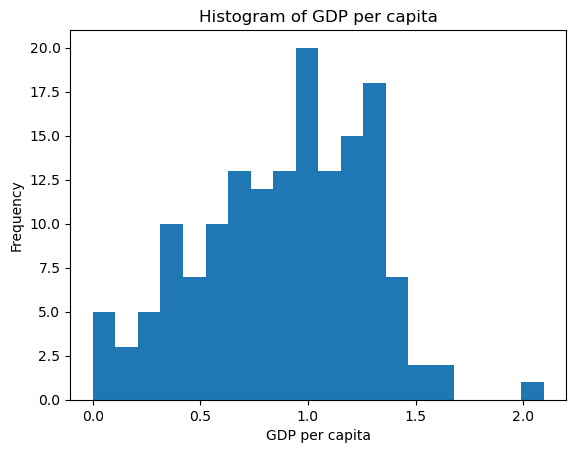

In [164]:
plt.hist(wh2018_df['GDP per capita'], bins = 20)
plt.xlabel('GDP per capita')
plt.ylabel('Frequency')
plt.title(f'Histogram of GDP per capita')
plt.show()

In [165]:
# Based on the GDP per capita histogram chart, in my opinion there no outlier values 

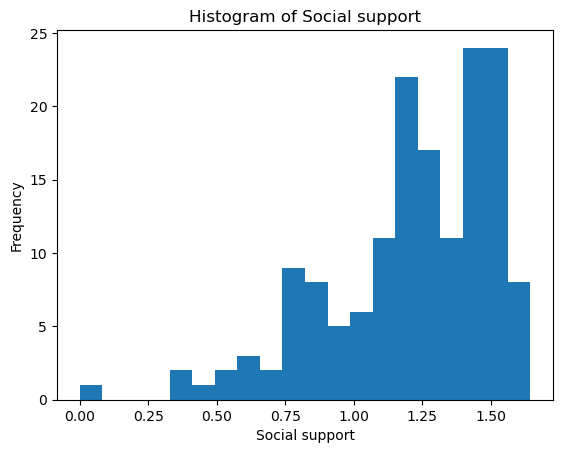

In [166]:
plt.hist(wh2018_df['Social support'], bins = 20)
plt.xlabel('Social support')
plt.ylabel('Frequency')
plt.title(f'Histogram of Social support')
plt.show()

In [167]:
# Based on the Social support histogram chart, in my opinion there no outlier values 

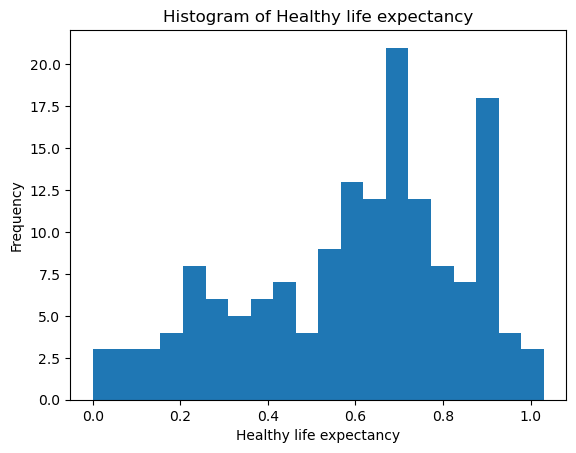

In [168]:
plt.hist(wh2018_df['Healthy life expectancy'], bins = 20)
plt.xlabel('Healthy life expectancy')
plt.ylabel('Frequency')
plt.title(f'Histogram of Healthy life expectancy')
plt.show()

In [169]:
# Based on the Healthy life expectancy histogram chart, in my opinion there no outlier values 

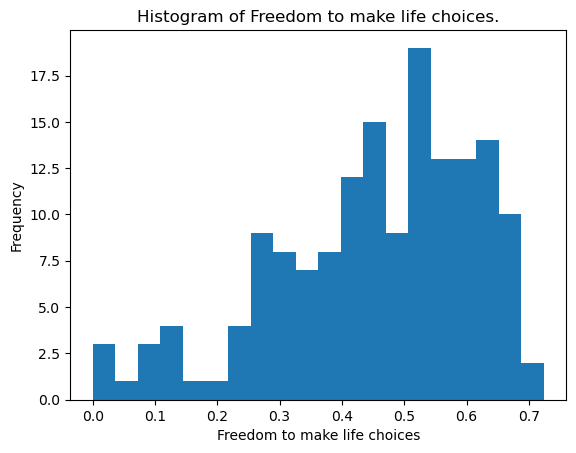

In [170]:
plt.hist(wh2018_df['Freedom to make life choices'], bins = 20)
plt.xlabel('Freedom to make life choices')
plt.ylabel('Frequency')
plt.title(f'Histogram of Freedom to make life choices.')
plt.show() 

In [171]:
# Based on the Freedom to make life choices histogram chart, in my opinion there no outlier values 

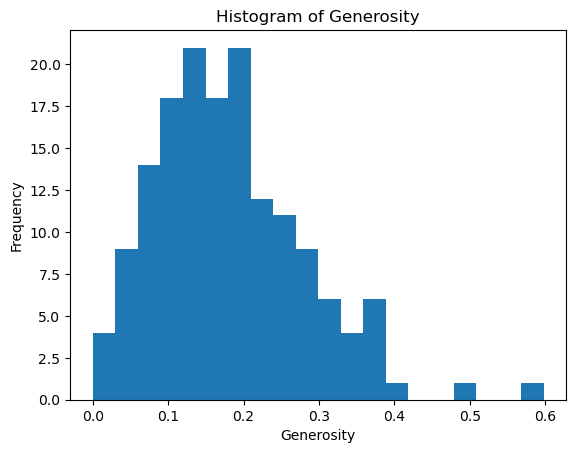

In [172]:
plt.hist(wh2018_df['Generosity'], bins = 20)
plt.xlabel('Generosity')
plt.ylabel('Frequency')
plt.title(f'Histogram of Generosity')
plt.show()

In [173]:
# Based on the Generosity histogram chart, in my opinion there no outlier values 

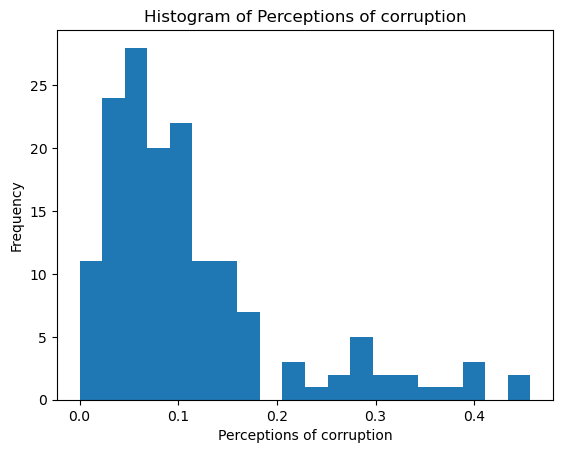

In [174]:
plt.hist(wh2018_df['Perceptions of corruption'], bins = 20)
plt.xlabel('Perceptions of corruption')
plt.ylabel('Frequency')
plt.title(f'Histogram of Perceptions of corruption')
plt.show()

In [175]:
# Based on the Perceptions of corruption histogram chart, in my opinion there no outlier values 

##### 2019

In [177]:
wh2019_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


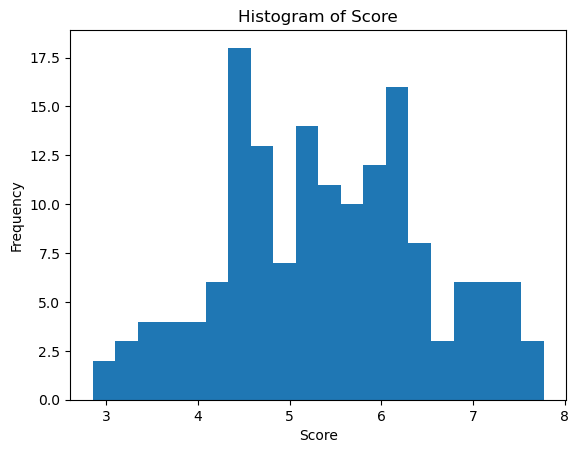

In [178]:
plt.hist(wh2019_df['Score'], bins = 20)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title(f'Histogram of Score')
plt.show()

In [179]:
# Based on the Score histogram chart, in my opinion there no outlier values 

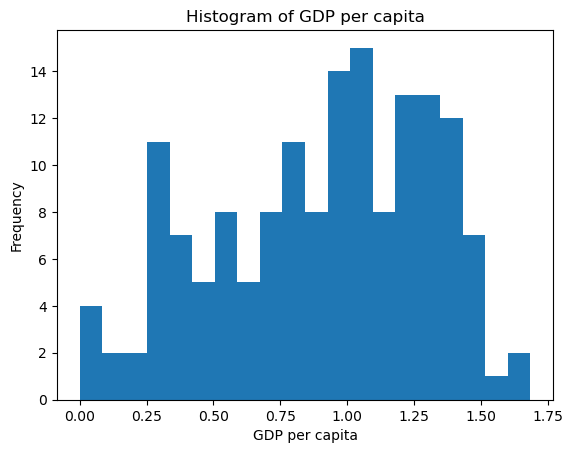

In [180]:
plt.hist(wh2019_df['GDP per capita'], bins = 20)
plt.xlabel('GDP per capita')
plt.ylabel('Frequency')
plt.title(f'Histogram of GDP per capita')
plt.show()

In [181]:
# Based on the GDP per capita histogram chart, in my opinion there no outlier values 

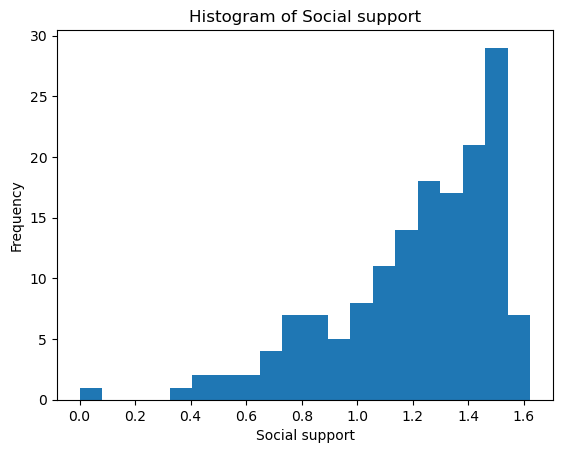

In [182]:
plt.hist(wh2019_df['Social support'], bins = 20)
plt.xlabel('Social support')
plt.ylabel('Frequency')
plt.title(f'Histogram of Social support')
plt.show()

In [183]:
# Based on the Social support histogram chart, in my opinion there no outlier values 

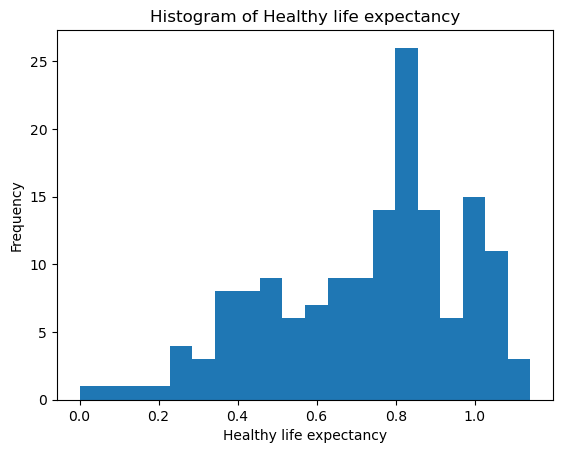

In [184]:
plt.hist(wh2019_df['Healthy life expectancy'], bins = 20)
plt.xlabel('Healthy life expectancy')
plt.ylabel('Frequency')
plt.title(f'Histogram of Healthy life expectancy')
plt.show()

In [185]:
# Based on the Healthy life expectancy histogram chart, in my opinion there no outlier values 

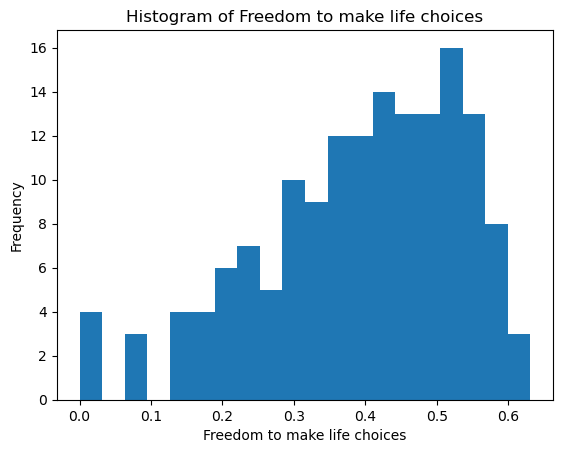

In [186]:
plt.hist(wh2019_df['Freedom to make life choices'], bins = 20)
plt.xlabel('Freedom to make life choices')
plt.ylabel('Frequency')
plt.title(f'Histogram of Freedom to make life choices')
plt.show()

In [187]:
# Based on the Freedom to make life choices histogram chart, in my opinion there no outlier values 

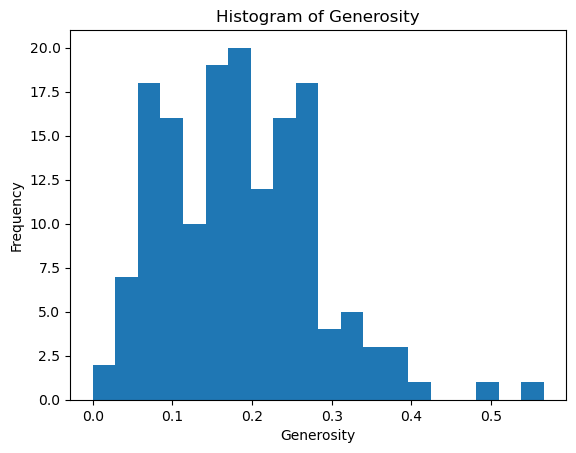

In [188]:
plt.hist(wh2019_df['Generosity'], bins = 20)
plt.xlabel('Generosity')
plt.ylabel('Frequency')
plt.title(f'Histogram of Generosity')
plt.show()

In [189]:
# Based on the Generosity histogram chart, in my opinion there no outlier values 

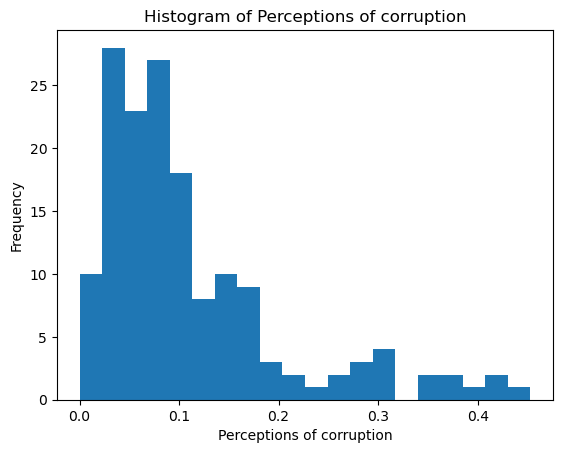

In [190]:
plt.hist(wh2019_df['Perceptions of corruption'], bins = 20)
plt.xlabel('Perceptions of corruption')
plt.ylabel('Frequency')
plt.title(f'Histogram of Perceptions of corruption')
plt.show()

In [191]:
# Based on the Perceptions of corruption histogram chart, in my opinion there no outlier values 

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

In [193]:
wh2017_df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capital),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia.Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [195]:
sorted2015_top_df = ( wh2015_df[['Country', 'Happiness Rank']].sort_values(by='Happiness Rank', ascending=True).head())

<function matplotlib.pyplot.show(close=None, block=None)>

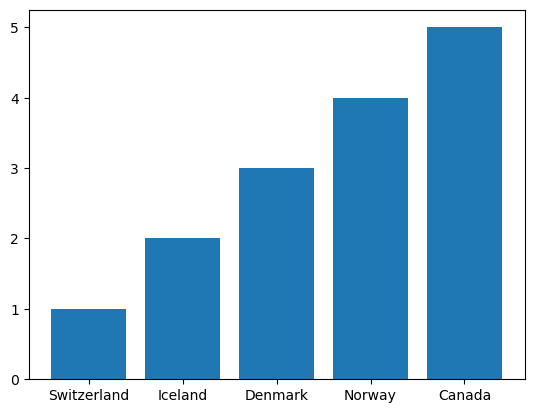

In [196]:
plt.bar(sorted2015_top_df['Country'],
        sorted2015_top_df['Happiness Rank'],
)
plt.show

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

### Q1.1) What countries or regions rank the highest in overall happiness?

##### 2015

In [200]:
sorted2015_top_df = ( wh2015_df[['Country', 'Happiness Rank']].sort_values(by='Happiness Rank', ascending=True).head())

<function matplotlib.pyplot.show(close=None, block=None)>

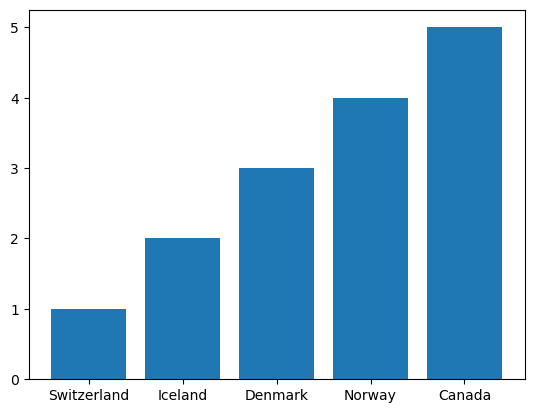

In [201]:
plt.bar(sorted2015_top_df['Country'],
        sorted2015_top_df['Happiness Rank']
        
)
plt.show

##### 2016

In [203]:
sorted2016_top_df = ( wh2016_df[['Country', 'Happiness Rank']].sort_values(by='Happiness Rank', ascending=True).head())


<function matplotlib.pyplot.show(close=None, block=None)>

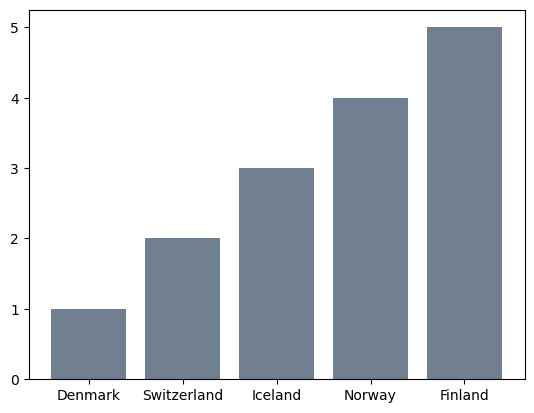

In [204]:
plt.bar(sorted2016_top_df['Country'],
        sorted2016_top_df['Happiness Rank'],
        color = 'slategrey'
        
)
plt.show

##### 2017

In [206]:
sorted2017_top_df = ( wh2017_df[['Country', 'Happiness Rank']].sort_values(by='Happiness Rank', ascending=True).head())


<function matplotlib.pyplot.show(close=None, block=None)>

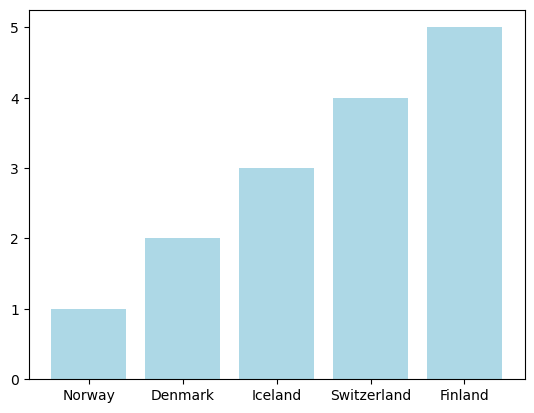

In [207]:
plt.bar(sorted2017_top_df['Country'],
        sorted2017_top_df['Happiness Rank'],
        color = 'lightblue'
        
)
plt.show

##### 2018

In [209]:
sorted2018_top_df = ( wh2018_df[['Country or region', 'Overall rank']].sort_values(by='Overall rank', ascending=True).head())


<function matplotlib.pyplot.show(close=None, block=None)>

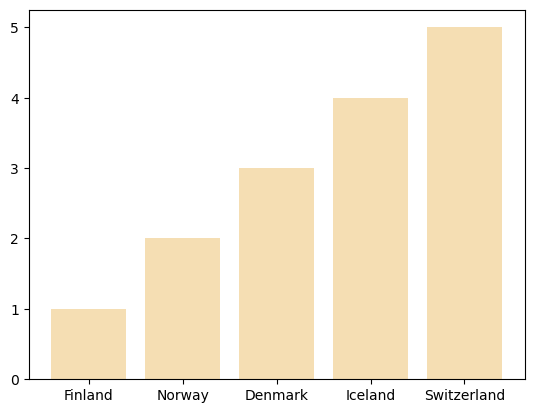

In [210]:
plt.bar(sorted2018_top_df['Country or region'],
        sorted2018_top_df['Overall rank'],
        color = 'wheat'
        
)
plt.show


##### 2019 

In [212]:
sorted2019_top_df = ( wh2019_df[['Country or region', 'Overall rank']].sort_values(by='Overall rank', ascending=True).head())


<function matplotlib.pyplot.show(close=None, block=None)>

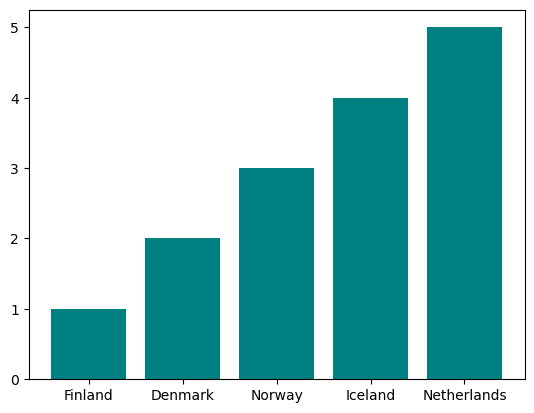

In [213]:
plt.bar(sorted2019_top_df['Country or region'],
        sorted2019_top_df['Overall rank'],
        color = 'teal'
        
)
plt.show

## Q1.2) the six factors contributing to happiness?

##### 2015

In [216]:
corr2015_matrix = wh2015_df.select_dtypes(include=np.number).corr()
corr2015_matrix

,Happiness Rank,Happiness Score,Economy (GDP per Capital),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Economy (GDP per Capital),-0.785267,0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


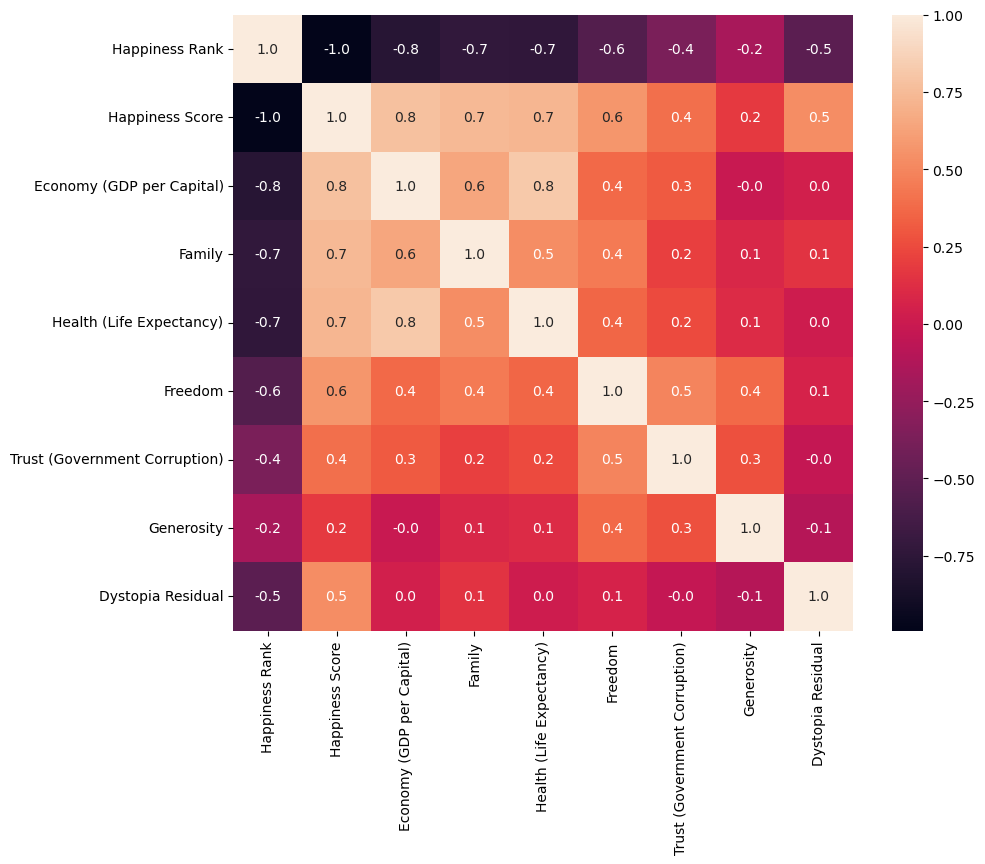

In [217]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr2015_matrix,
            annot=True, 
            fmt=".1f"
           )


plt.show()

In [ ]:
# as we can see in the heatmap the factor that conrtibute is economy  

##### 2016

In [219]:
corr2016_matrix = wh2016_df.select_dtypes(include=np.number).corr()
corr2016_matrix

,Happiness Rank,Happiness Score,Economy (GDP per Capital),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.995743,-0.793577,-0.733276,-0.767991,-0.557169,-0.387102,-0.145369,-0.542616
Happiness Score,-0.995743,1.000000,0.790322,0.739252,0.765384,0.566827,0.402032,0.156848,0.543738
Economy (GDP per Capital),-0.793577,0.790322,1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531,0.068624
Family,-0.733276,0.739252,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629,0.119672
Health (Life Expectancy),-0.767991,0.765384,0.837067,0.588377,1.000000,0.341199,0.249583,0.075987,0.100857
Freedom,-0.557169,0.566827,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751,0.091631
Trust (Government Corruption),-0.387102,0.402032,0.294185,0.213561,0.249583,0.502054,1.000000,0.305930,-0.002909
Generosity,-0.145369,0.156848,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000,-0.133001
Dystopia Residual,-0.542616,0.543738,0.068624,0.119672,0.100857,0.091631,-0.002909,-0.133001,1.000000


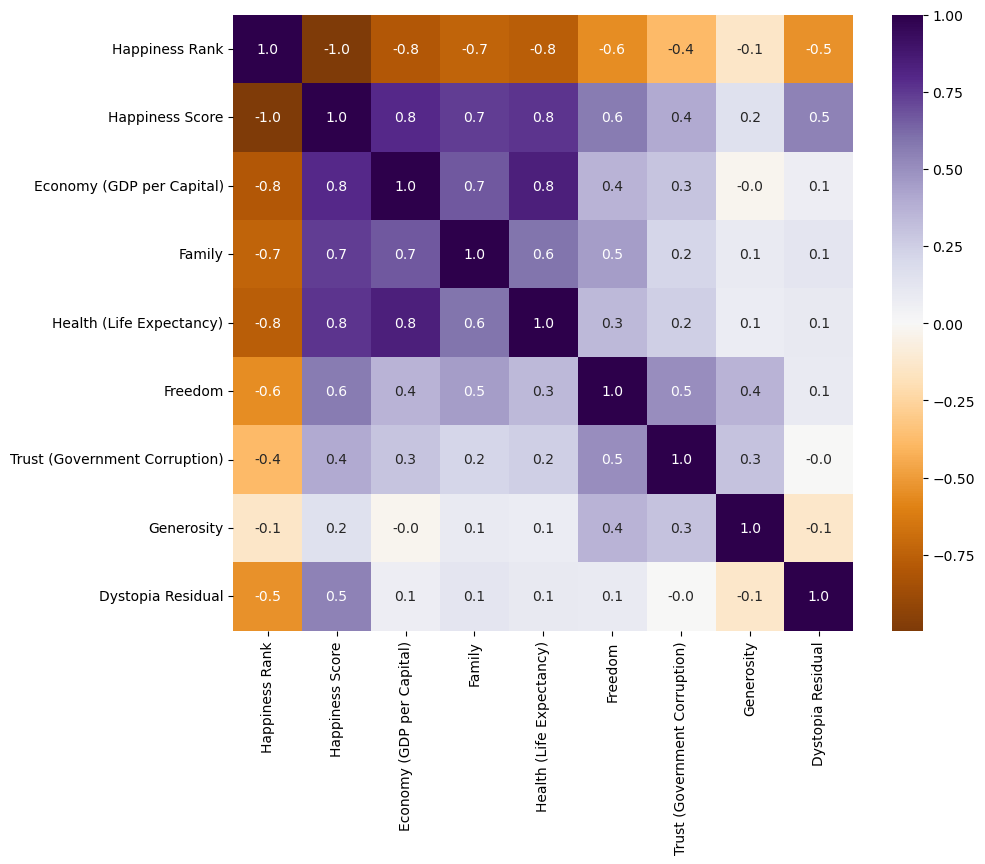

In [220]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr2016_matrix,
            annot=True, 
            cmap='PuOr',
            fmt=".1f"
           )


plt.show()

In [ ]:
# as we can see in the heatmap the factor that conrtibute is economy and health  

##### 2017 

In [222]:
corr2017_matrix = wh2017_df.select_dtypes(include=np.number).corr()
corr2017_matrix

,Happiness Rank,Happiness Score,Economy (GDP per Capital),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia.Residual
Happiness Rank,1.000000,-0.992774,-0.813244,-0.736753,-0.780716,-0.551608,-0.132620,-0.405842,-0.484506
Happiness Score,-0.992774,1.000000,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080,0.475355
Economy (GDP per Capital),-0.813244,0.812469,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
Family,-0.736753,0.752737,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
Health (Life Expectancy),-0.780716,0.781951,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
Freedom,-0.551608,0.570137,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
Generosity,-0.132620,0.155256,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
Trust (Government Corruption),-0.405842,0.429080,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755
Dystopia.Residual,-0.484506,0.475355,0.024226,0.070506,0.054963,0.081926,-0.116627,-0.022755,1.000000


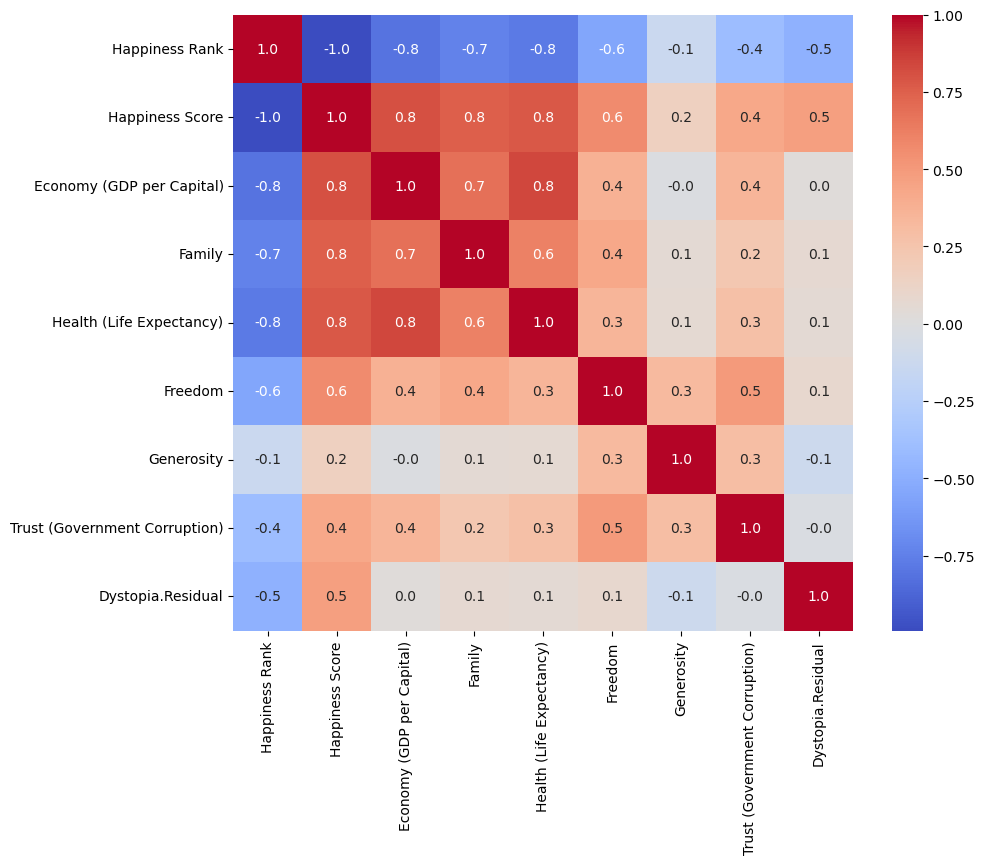

In [223]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr2017_matrix,
            annot=True, 
            cmap='coolwarm',
            fmt=".1f"
           )


plt.show()

In [ ]:
# as we can see in the heatmap the factor that conrtibute is economy, health and family   

##### 2018

In [225]:
corr2018_matrix = wh2018_df.select_dtypes(include=np.number).corr()
corr2018_matrix

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.991749,-0.805897,-0.737500,-0.778700,-0.530786,-0.103602,-0.377320
Score,-0.991749,1.000000,0.802124,0.745760,0.775814,0.544280,0.135825,0.410943
GDP per capita,-0.805897,0.802124,1.000000,0.672080,0.844273,0.332275,-0.011241,0.331656
Social support,-0.737500,0.745760,0.672080,1.000000,0.667288,0.411087,0.018226,0.204888
Healthy life expectancy,-0.778700,0.775814,0.844273,0.667288,1.000000,0.355475,0.020751,0.316303
Freedom to make life choices,-0.530786,0.544280,0.332275,0.411087,0.355475,1.000000,0.297988,0.450725
Generosity,-0.103602,0.135825,-0.011241,0.018226,0.020751,0.297988,1.000000,0.361009
Perceptions of corruption,-0.377320,0.410943,0.331656,0.204888,0.316303,0.450725,0.361009,1.000000


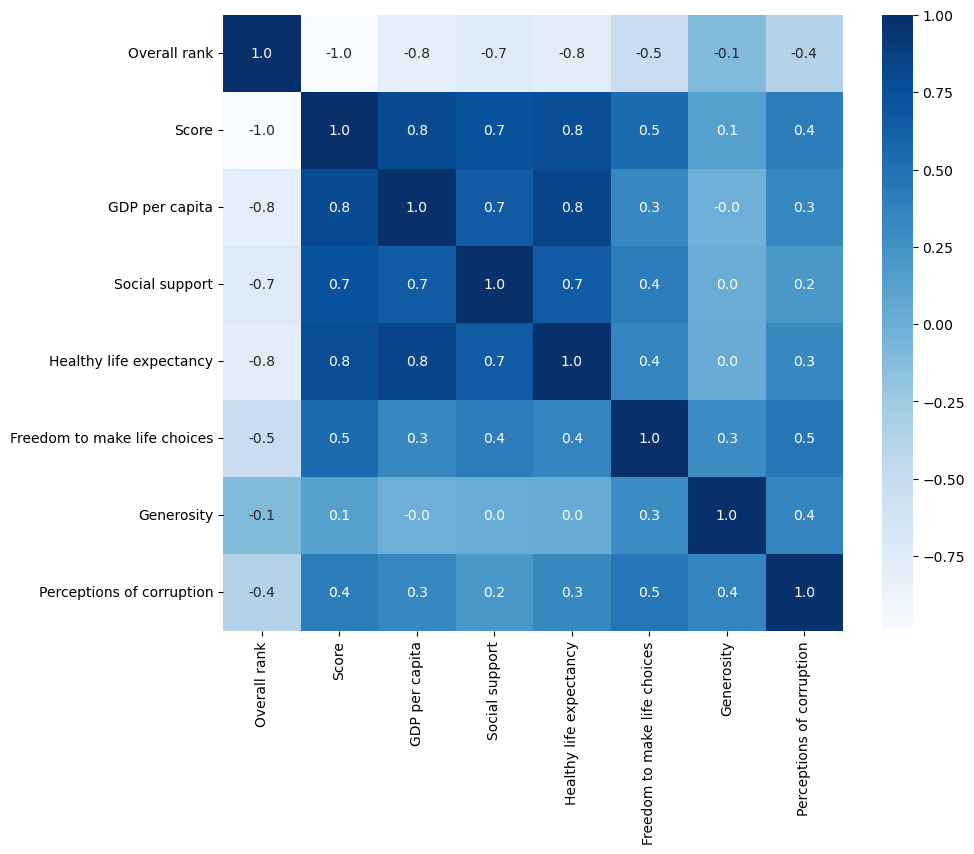

In [226]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr2018_matrix,
            annot=True, 
            cmap='Blues',
            fmt=".1f"
           )


plt.show()

In [ ]:
# as we can see in the heatmap the factor that conrtibute is GDP and health  

##### 2019 

In [228]:
corr2019_matrix = wh2019_df.select_dtypes(include=np.number).corr()
corr2019_matrix

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


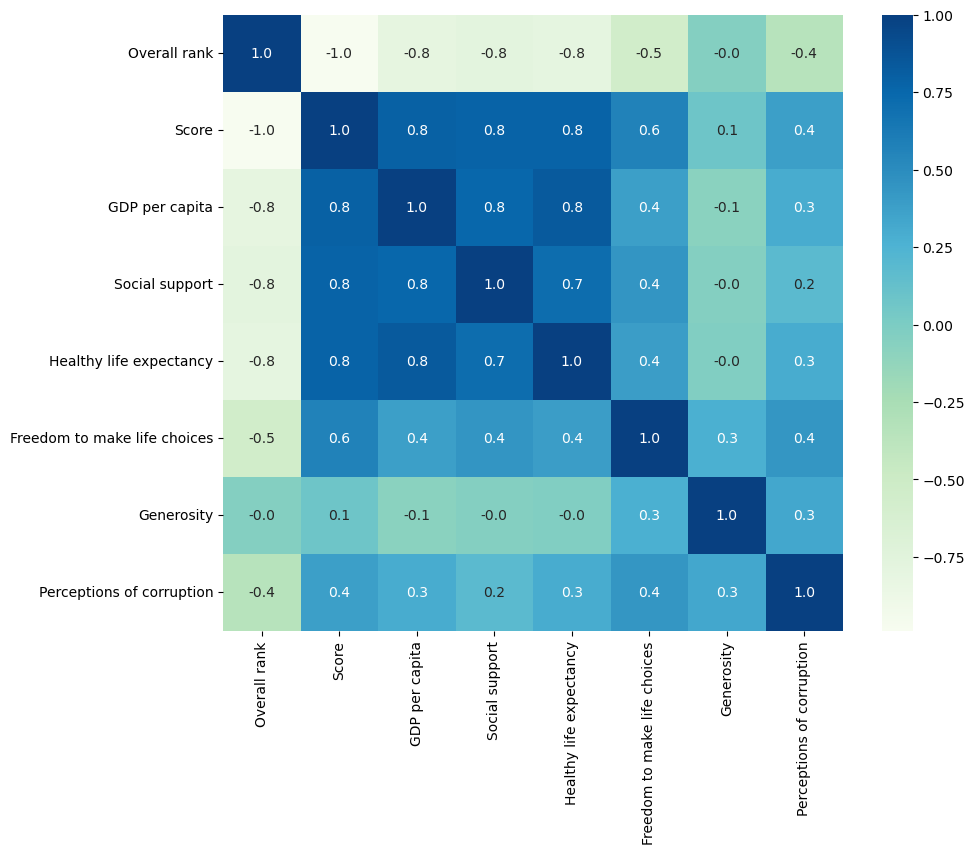

In [229]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr2019_matrix,
            annot=True, 
            cmap='GnBu',
            fmt=".1f"
           )


plt.show()

In [ ]:
# as we can see in the heatmap the factor that conrtibute is GDP, health and family   

### Q2) How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports?, 
### Did any country experience a significant increase or decrease in happiness?

In [427]:
top_2015 = wh2015_df[['Country', 'Happiness Rank']].head()

In [431]:
top_2016 = wh2016_df[['Country', 'Happiness Rank']].head()

In [433]:
top_2017 = wh2017_df[['Country', 'Happiness Rank']].head()

In [497]:
tops_df = pd.concat([top_2015, top_2016, top_2017], ignore_index=True)

In [532]:
tops_df['Year'] = tops_df['Year'].astype(str)

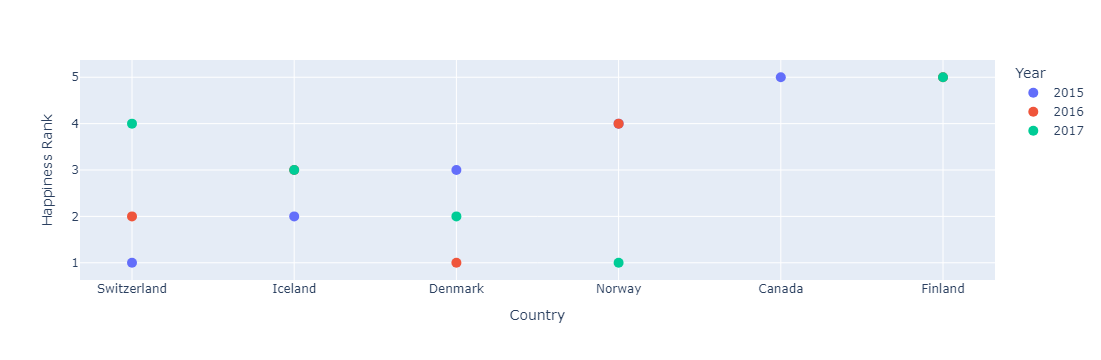

In [538]:
fig = px.scatter(tops_df, y=tops_df['Happiness Rank'], x= tops_df['Country'], hover_data = 'Year', color='Year')
fig.update_traces(marker_size=10)

fig.show()

In [ ]:
# Based on the scatter chart as we see Switzerland is staying at the top 5, as for Finland in years 2015, 2016 it wasn't in the top 5 but in 2017 the came 5th